lev2 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
levind 0 [0.  0.1] 0.1
levind 1 [0.1 0.2] 0.2
levind 2 [0.2 0.3] 0.3
levind 3 [0.3 0.4] 0.4
levind 4 [0.4 0.5] 0.5
levind 5 [0.5 0.6] 0.6
levind 6 [0.6 0.7] 0.7
levind 7 [0.7 0.8] 0.8
levind 8 [0.8 0.9] 0.8999999999999999
levind 9 [0.9 1. ] 1.0
plotfile test.pdf


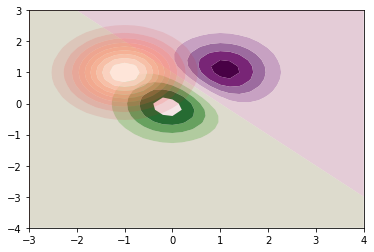

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

# Default delta is large because that makes it fast, and it illustrates
# the correct registration between image and contours.
delta = 0.2

extent = (-3, 4, -4, 3)

x = np.arange(-3.0, 4.001, delta)
y = np.arange(-4.0, 3.001, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2
Z3 = np.exp(-(X + 1)**2 - (Y - 1)**2)


# Boost the upper limit to avoid truncation errors.
levels = np.arange(-2.0, 1.601, 0.4)
lev2 = np.arange(0.,1.1,0.1)
print('lev2',lev2)

norm = cm.colors.Normalize(vmax=abs(Z).max(), vmin=-abs(Z).max())
cmap = cm.Blues
cmap = cm.PRGn

bounds = lev2
cmap2 = cm.get_cmap("Reds_r").copy()
norm2 = cm.colors.BoundaryNorm(bounds, cmap2.N, extend='both')
cmap2a = cm.ScalarMappable(norm=norm, cmap=cmap2)

fig, ax = plt.subplots(nrows=1, ncols=1)

cset1 = ax.contourf(X, Y, Z, levels, norm=norm, zorder=1, antialiased=True,
                        cmap=cm.get_cmap(cmap, len(levels) - 1))

#cset1 = ax.contourf(X, Y, Z1, lev2, norm=norm2, zorder=2, cmap=cmap2)

for levind in range(len(lev2)-1):
    cl2 = lev2[levind:levind+2]
    sf = float(levind)/(len(lev2)-2)
    almin = 0.1
    almax = 1.0
    alpha = almin + sf*(almax-almin)
    #alpha = 1.0
    print ("levind",levind, cl2, alpha)
    cset1 = ax.contourf(X, Y, Z3, levels=cl2, alpha=alpha, cmap=cmap2, norm=norm2, zorder=3, antialiased=True)


plotfile = 'test.pdf'
fig.savefig(plotfile)
print('plotfile',plotfile)
plt.show()